<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">PROJET: Stroke Detection Model</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Step 1 - Data description</h2>
</div>

## Dataset attributes:
1) id: unique patient identifier
2) gender: “Male”, “Female” or “Other”
3) age: age of the patient
4) hypertension: 0 (if the patient doesn’t have hypertension) or 1 (if the patient has hypertension)
5) heart_disease: 0 (if the patient doesn’t have a heart disease) or 1 (if the patient has a heart disease)
6) ever_married: “No” or “Yes”
7) work_type: “children”, “Govt_job”, “Never_worked”, “Private” or “Self-employed”
8) Residence_type: “Rural” or “Urban”
9) avg_glucose_level: average glucose level in the blood
10) bmi: body mass index
11) smoking_status: “formerly smoked”, “never smoked”, “smokes” or “Unknown” (in this case the information for the patient is not available)
12) stroke: 1 (if the patient had a stroke) or 0 (if the patient didn’t have a stroke)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Importations</h3>
</div>

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Sources
df = pd.read_csv('stroke_data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


We see that there is only 1 column with a UPPERcase "Residence-type".<br/>
We will modify this for more coherency.

In [3]:
# df rename
df = df.rename(str.lower, axis='columns')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Univariate Data analysis</h3>
</div>

In [4]:
# df size
df.shape

(5110, 12)

In [5]:
# df description for quantitative variable
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# df description for qualitative variable
df.describe(include='object')

,gender,ever_married,work_type,residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [7]:
# columns types
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# "id" column

The ID column is not relevant to our analysis, but we would like to keep it as a record.<br/>
We will convert it into an index.<br/>
We already know that there is no NaN in this column (df.describe())
1) We will test if the index is unique
2) we will convert ID column as an index

In [8]:
# function for testing that all value of a column are unique
def isUnique(df, columns):
    if df.size == df.drop_duplicates(columns).size :
        print("Key is unique")
    else :
        print("/!\ Key is not unique /!\.")

In [9]:
# check
isUnique(df, "id")

Key is unique


In [10]:
# set of ID column as an index
df.set_index("id", inplace=True)

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# "gender" column

We already know that there is no NaN in this column (df.describe())<br/>
We will check the different possible modality.

In [12]:
# count of the different modalities
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [13]:
# observation of the unique "Other"
df[df.gender == "Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


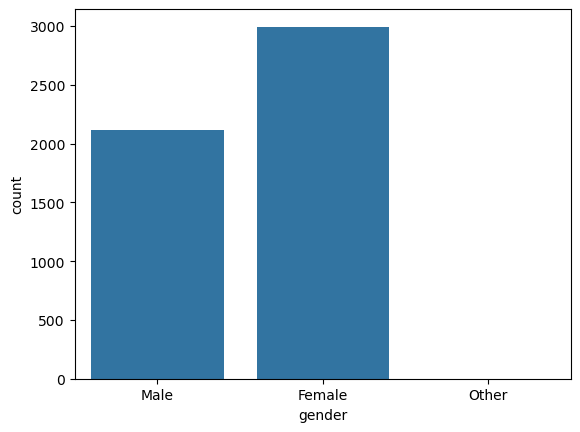

In [14]:
# Distribution plot
sns.countplot(df, x="gender")
plt.show()

# "age" column

We saw in the df.describe() that:
1) there is no NaN
2) the mean of age is around 43 years and the max of age is around 82 years
3) the minimum age seems very low => 0.080000 (we have to verify if it is not an error)

In [15]:
# observation of all rows with an age lowest as 1 year
df[df.age <= 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
47876,Male,1.00,0,0,No,children,Rural,89.30,21.4,Unknown,0
57372,Male,1.00,0,0,No,children,Rural,123.21,15.1,Unknown,0
54747,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
66772,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
68908,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0


It is seems to be OK. We have only children in the results (work_type column) and no stroke at all.

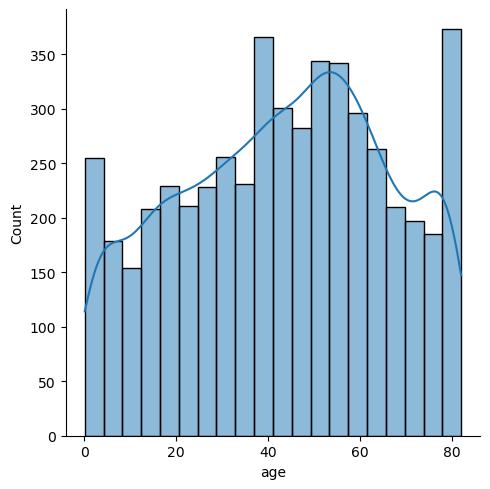

In [16]:
# Distribution plot
sns.displot( data=df["age"], kde=True )
plt.show()

# "hypertension" and "heart_disease" columns

We saw in the df.describe() that:
1) there is no NaN for these 2 boolean columns
2) For this 2 columns the means are very low (0.097456 and 0.054012)<br/>
We can have here an hypothesis which these low means are related with a very unbalanced dataset (mean of stroke column is only 0.048728)<br/>
But this is right only if hypertension and heart_disease are corelated with stroke.<br/>
We will see this later in the Notebook and we will have to find a solution about this unbalanced stroke column.

In [17]:
# count of the different modalities to be sure that the hypertension column is a boolean
df.hypertension.value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

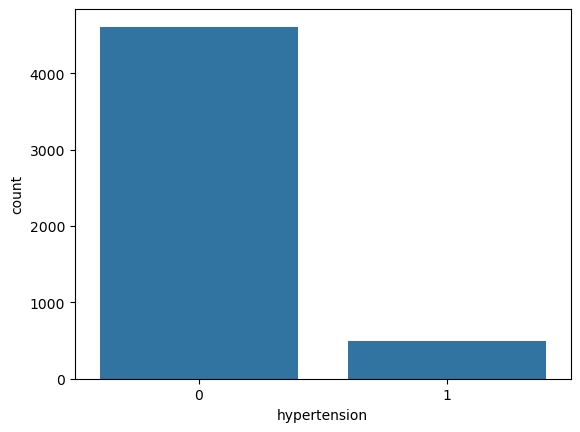

In [18]:
# Distribution plot
sns.countplot(df, x="hypertension")
plt.show()

In [19]:
# count of the different modalities to be sure that the heart_disease column is a boolean
df.heart_disease.value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

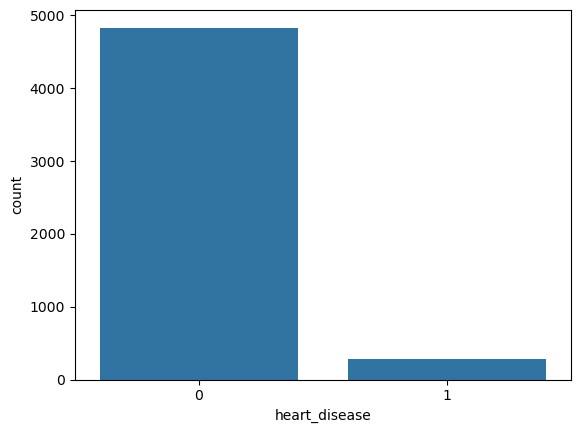

In [20]:
# Distribution plot
sns.countplot(df, x="heart_disease")
plt.show()

# "ever_married" column

We already know that there is no NaN in this column (df.describe()).<br/>
We will check the different possible modality.

In [21]:
# count of the different modalities
df.ever_married.value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

This column is unbalanced too. We don't know if there is a correlation between "ever_married" and "stroke"<br/>
even if being married can be a good reason to had a stroke :-).<br/>
Seriously, we will keep this in mind for the next steps in the notebook.

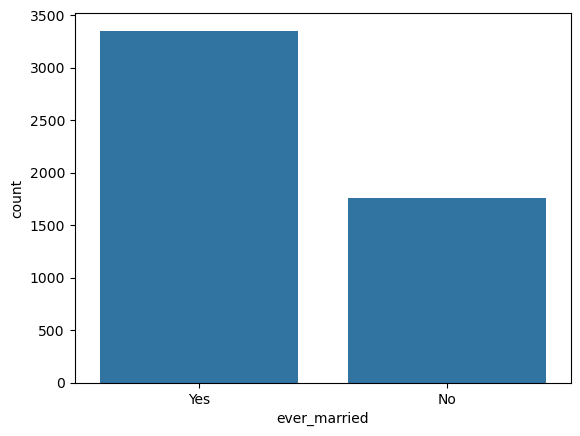

In [22]:
# Distribution plot
sns.countplot(df, x="ever_married")
plt.show()

# "work_type" column

We already know that there is no NaN in this column (df.describe()).<br/>
We will check the different possible modality.

In [23]:
# count of the different modalities
df.work_type.value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

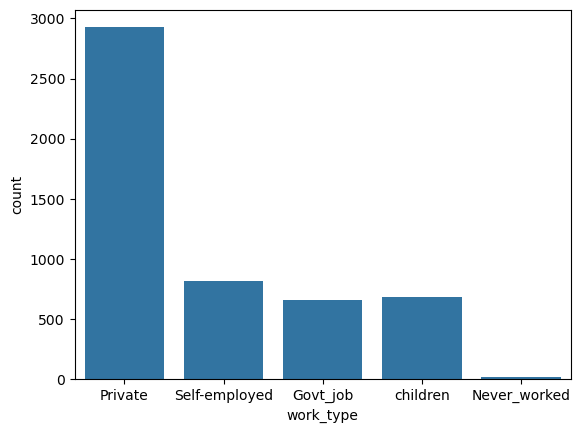

In [24]:
# Distribution plot
sns.countplot(df, x="work_type")
plt.show()

# "residence_type" column

We already know that there is no NaN in this column (df.describe()).<br/>
We will check the different possible modality.

In [25]:
# count of the different modalities
df.residence_type.value_counts()

residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

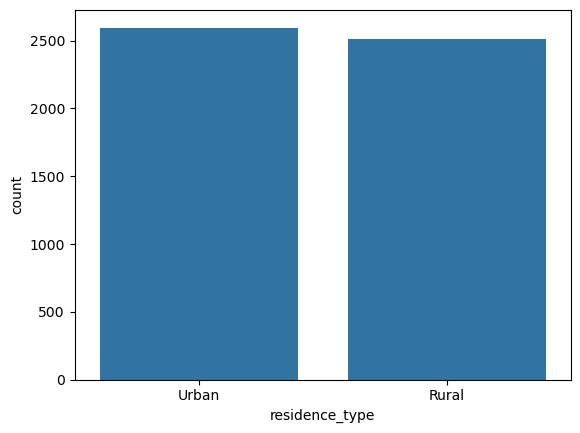

In [26]:
# Distribution plot
sns.countplot(df, x="residence_type")
plt.show()

# "avg_glucose_level" column

We saw in the df.describe() that:
1) there is no NaN

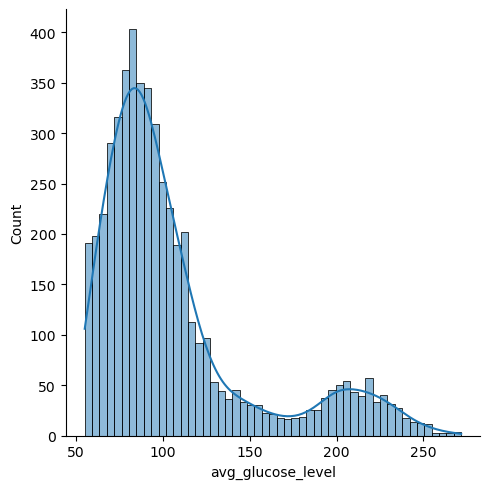

In [27]:
# Distribution plot
sns.displot( data=df["avg_glucose_level"], kde=True )
plt.show()

# "bmi" column

We saw in the df.describe() that we have Null values

In [28]:
# count of NaN
df.bmi.isna().sum()

201

We will impute NaN by mean.<br/>
We believe that it is more accurate to perform this imputation by separating groups by age and gender.

In [29]:
# Creation of age categories
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
df['age_cat'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Mean by "age_cat" and "gender"
mean_bmi_by_group = df.groupby(['age_cat', 'gender'], observed=True)['bmi'].mean().reset_index()

# Avoid conflict with column's name
mean_bmi_by_group.rename(columns={'bmi': 'mean_bmi'}, inplace=True)

# Merge with initial dataframe
df_merged = pd.merge(df, mean_bmi_by_group, on=['age_cat', 'gender'], how='left')

# Imputation of NaN values
df_merged['bmi_imputed'] = df_merged['bmi'].fillna(df_merged['mean_bmi'])

# Drop adding columns
df = df_merged.drop(['bmi', 'mean_bmi', 'age_cat'], axis=1)

# Formating
df.rename(columns={'bmi_imputed': 'bmi'}, inplace=True)
df['bmi'] = df['bmi'].round(2)

# Observation
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.60
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,30.78
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.50
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.40
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.00


We don't have NaN yet

In [30]:
# count of NaN
df.bmi.isna().sum()

0

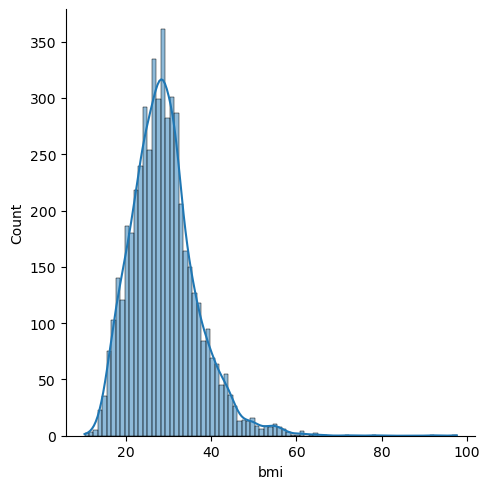

In [31]:
# Distribution plot
sns.displot( data=df["bmi"], kde=True )
plt.show()

# "smoking_status" column

We already know that there is no NaN in this column (df.describe()).<br/>
We will check the different possible modality.

In [32]:
# count of the different modalities
df.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

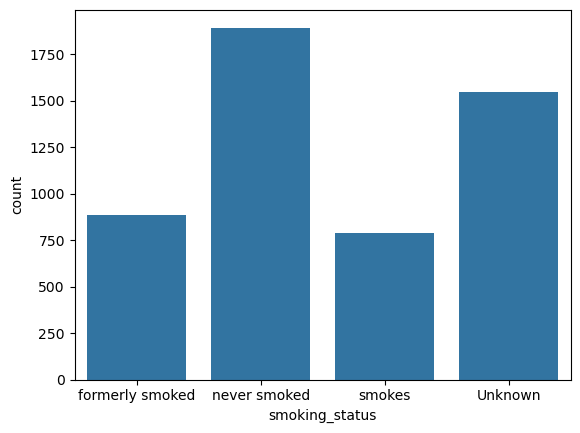

In [33]:
# Distribution plot
sns.countplot(df, x="smoking_status")
plt.show()

# "stroke" column

This is our target variable (boolean like (0 or 1))<br/>
We already know that there is no NaN in this column (df.describe()).<br/>
We will check the different possible modality.

In [34]:
# count of the different modalities
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

This dataset is totally unbalanced.<br/>
In this situation, a model will be excellent for detecting No stroke (0) but will be very bad to detect stroke (1).<br/>
We will have to correct this situation before training our model later in the notebook.

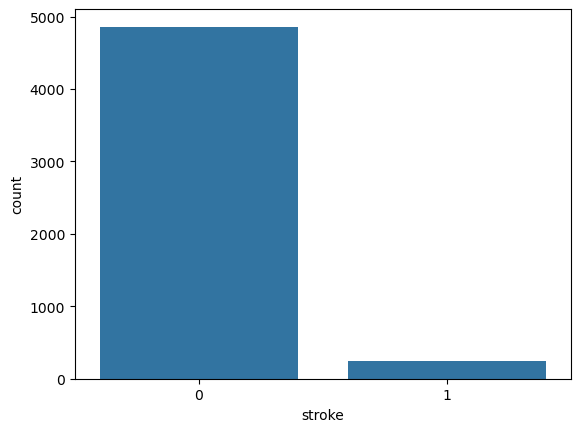

In [35]:
# Distribution plot
sns.countplot(df, x="stroke")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Multivariate Data analysis</h3>
</div>

We have 3 continuous variables in our dataset. ('age', 'bmi', 'avg_glucose_level')<br/>
Searching for the most discriminating variables for explaining stroke can be interesting.

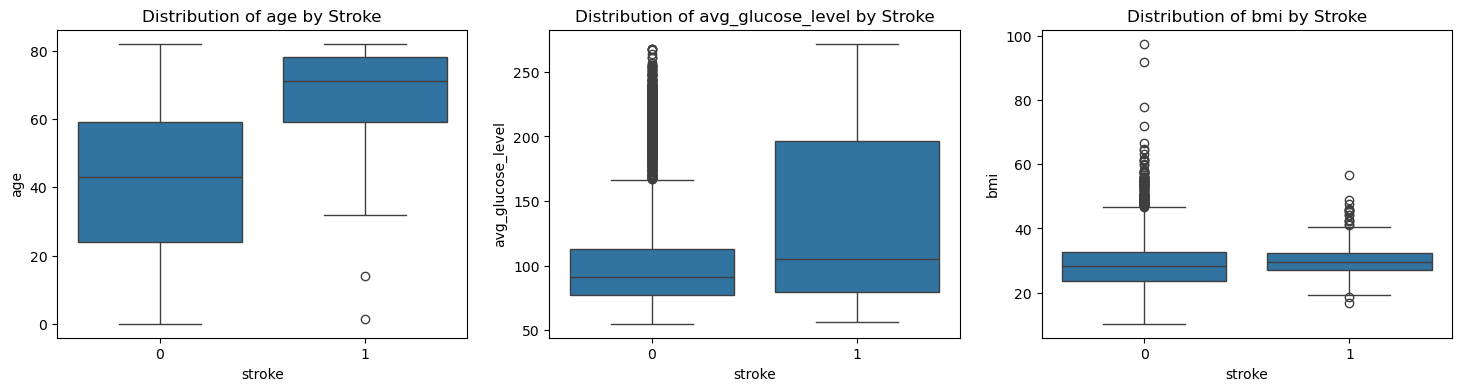

In [36]:
numeric_features = ['age', 'avg_glucose_level', 'bmi']

# Subplots creation
fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 4))

# Loop through each numeric feature and plot a boxplot
for i, feature in enumerate(numeric_features):
    sns.boxplot(x='stroke', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature} by Stroke")

plt.show()

Age and avg_glucose_level can participate in explanation if a victim had a stroke.<br/>
Surprisingly, bmi doesn't seem to be a good discriminant.

# ------------------------

We have 7 discrete variables in our dataset. ('gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status')<br/>
Searching for the most discriminating variables for explaining stroke can be interesting.

# "gender" column

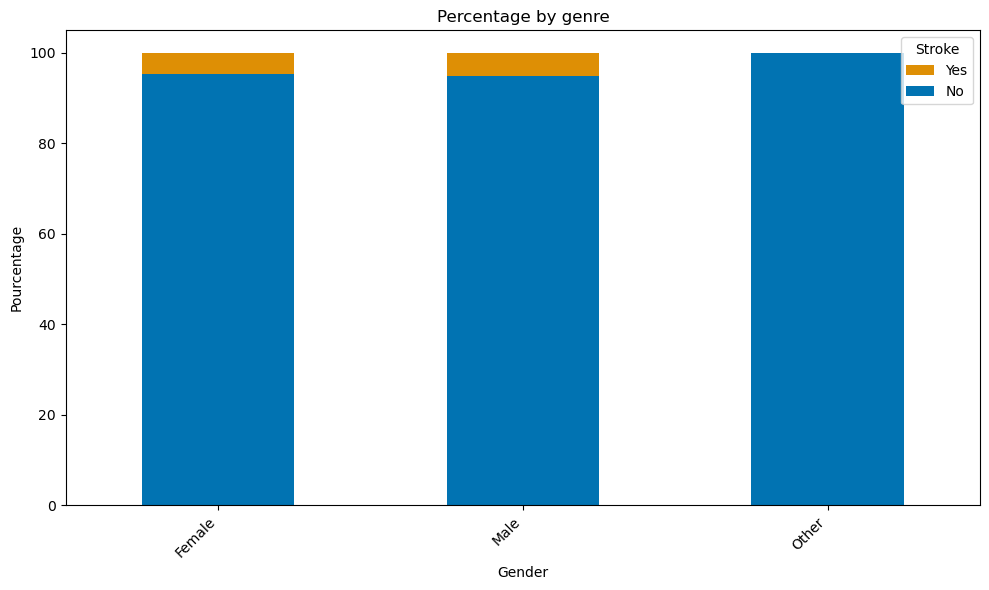

In [37]:
# Filter of wanted columns
df_filtered = df.filter(items=['gender', 'stroke'])

# Map of modalities
df_filtered['stroke'] = df_filtered['stroke'].map({1: 'Yes', 0: 'No'})

# Percentages calculation
pourcentages = df_filtered.groupby(['gender', 'stroke']).size().unstack() * 100 / df_filtered.groupby('gender').size().values[:, None]

# Seaborn default colors
sns.set_palette("colorblind")

# Subplots creation
fig, ax = plt.subplots(figsize=(10, 6))
pourcentages.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette("colorblind"))

# Look and feel
ax.set_title('Percentage by genre')
ax.set_xlabel('Gender')
ax.set_ylabel('Pourcentage')
ax.set_xticklabels(pourcentages.index, rotation=45, ha='right')

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::-1], labels=labels[::-1], title='Stroke', loc='upper right')

# Display
plt.tight_layout()
plt.show()

Gender doesn't seem to be a good discriminant.

# "hypertension" column

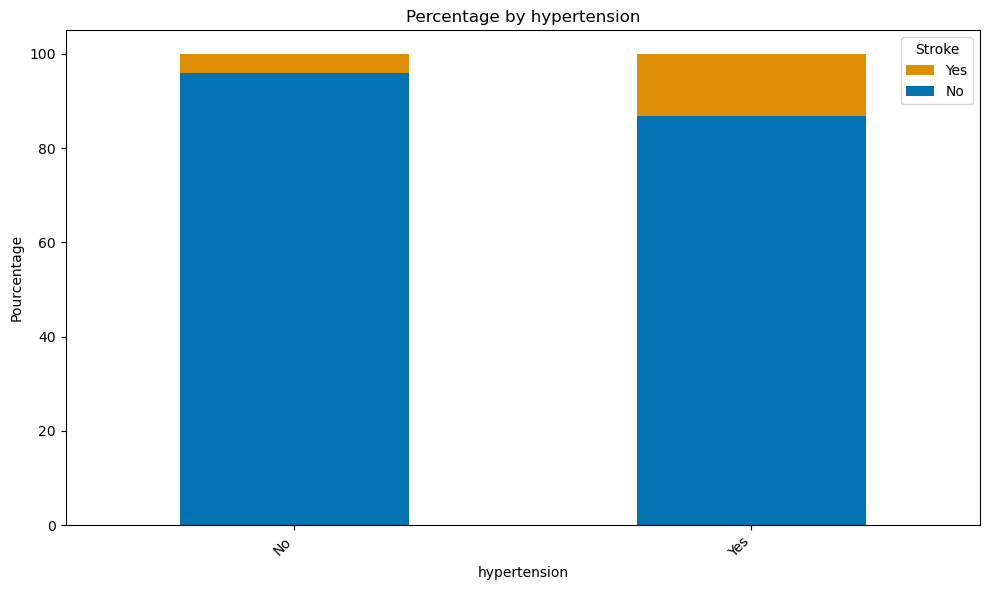

In [38]:
# Filter of wanted columns
df_filtered = df.filter(items=['hypertension', 'stroke'])

# Map of modalities
df_filtered['hypertension'] = df_filtered['hypertension'].map({1: 'Yes', 0: 'No'})
df_filtered['stroke'] = df_filtered['stroke'].map({1: 'Yes', 0: 'No'})

# Percentages calculation
pourcentages = df_filtered.groupby(['hypertension', 'stroke']).size().unstack() * 100 / df_filtered.groupby('hypertension').size().values[:, None]

# Seaborn default colors
sns.set_palette("colorblind")

# Subplots creation
fig, ax = plt.subplots(figsize=(10, 6))
pourcentages.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette("colorblind"))

# Look and feel
ax.set_title('Percentage by hypertension')
ax.set_xlabel('hypertension')
ax.set_ylabel('Pourcentage')
ax.set_xticklabels(pourcentages.index, rotation=45, ha='right')

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::-1], labels=labels[::-1], title='Stroke', loc='upper right')

# Display
plt.tight_layout()
plt.show()

It seems that hypertension has an influence for stroke.

# "heart_disease" column

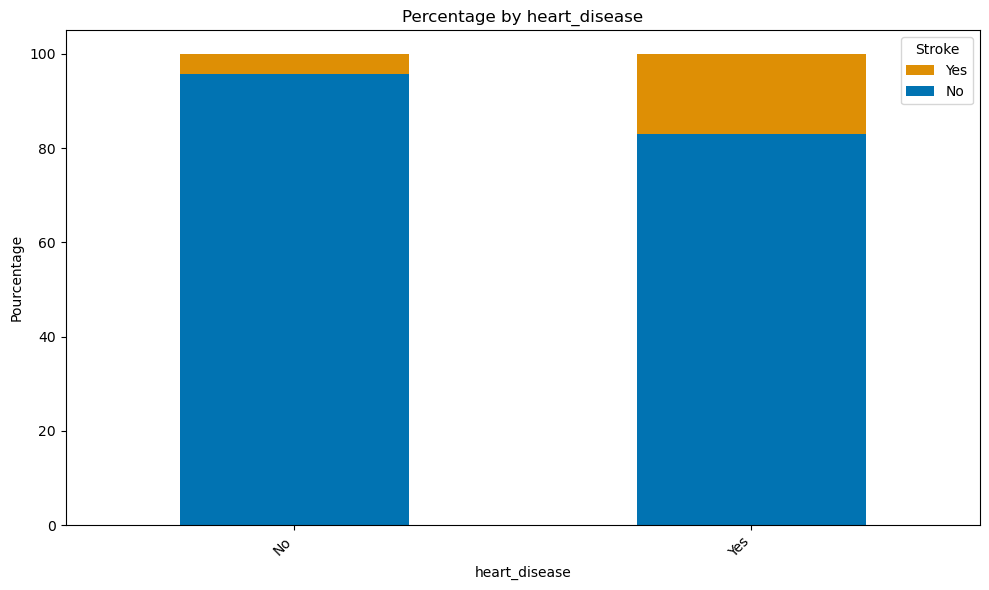

In [39]:
# Filter of wanted columns
df_filtered = df.filter(items=['heart_disease', 'stroke'])

# Map of modalities
df_filtered['heart_disease'] = df_filtered['heart_disease'].map({1: 'Yes', 0: 'No'})
df_filtered['stroke'] = df_filtered['stroke'].map({1: 'Yes', 0: 'No'})

# Percentages calculation
pourcentages = df_filtered.groupby(['heart_disease', 'stroke']).size().unstack() * 100 / df_filtered.groupby('heart_disease').size().values[:, None]

# Seaborn default colors
sns.set_palette("colorblind")

# Subplots creation
fig, ax = plt.subplots(figsize=(10, 6))
pourcentages.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette("colorblind"))

# Look and feel
ax.set_title('Percentage by heart_disease')
ax.set_xlabel('heart_disease')
ax.set_ylabel('Pourcentage')
ax.set_xticklabels(pourcentages.index, rotation=45, ha='right')

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::-1], labels=labels[::-1], title='Stroke', loc='upper right')

# Display
plt.tight_layout()
plt.show()

Even if it is obvious, it seems that heart_disease has an influence for stroke. 

# "ever_married" column

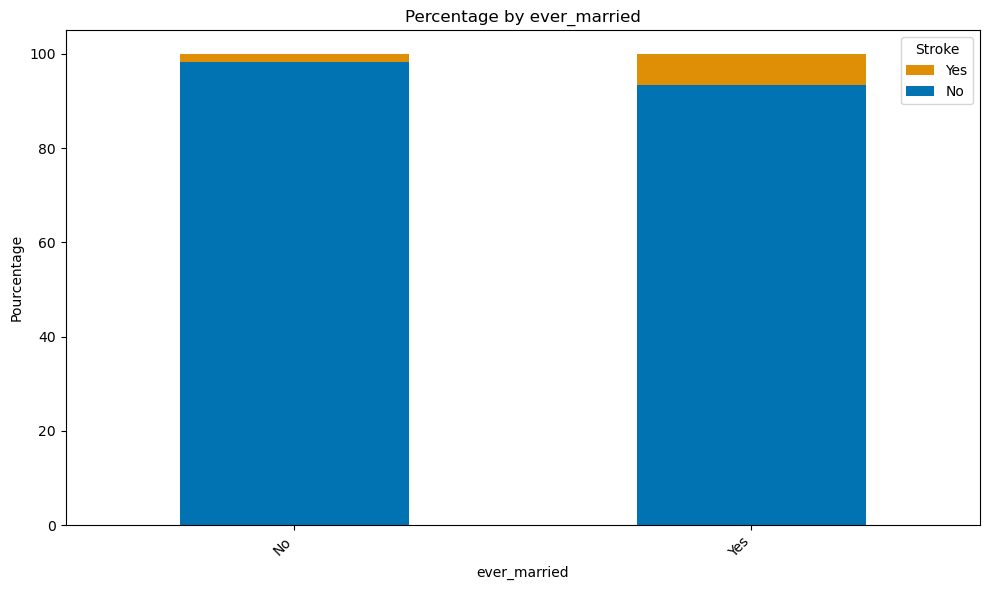

In [40]:
# Filter of wanted columns
df_filtered = df.filter(items=['ever_married', 'stroke'])

# Map of modalities
df_filtered['stroke'] = df_filtered['stroke'].map({1: 'Yes', 0: 'No'})

# Percentages calculation
pourcentages = df_filtered.groupby(['ever_married', 'stroke']).size().unstack() * 100 / df_filtered.groupby('ever_married').size().values[:, None]

# Seaborn default colors
sns.set_palette("colorblind")

# Subplots creation
fig, ax = plt.subplots(figsize=(10, 6))
pourcentages.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette("colorblind"))

# Look and feel
ax.set_title('Percentage by ever_married')
ax.set_xlabel('ever_married')
ax.set_ylabel('Pourcentage')
ax.set_xticklabels(pourcentages.index, rotation=45, ha='right')

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::-1], labels=labels[::-1], title='Stroke', loc='upper right')

# Display
plt.tight_layout()
plt.show()

It seems that ever_married has a small influence for stroke.

# "work_type" column

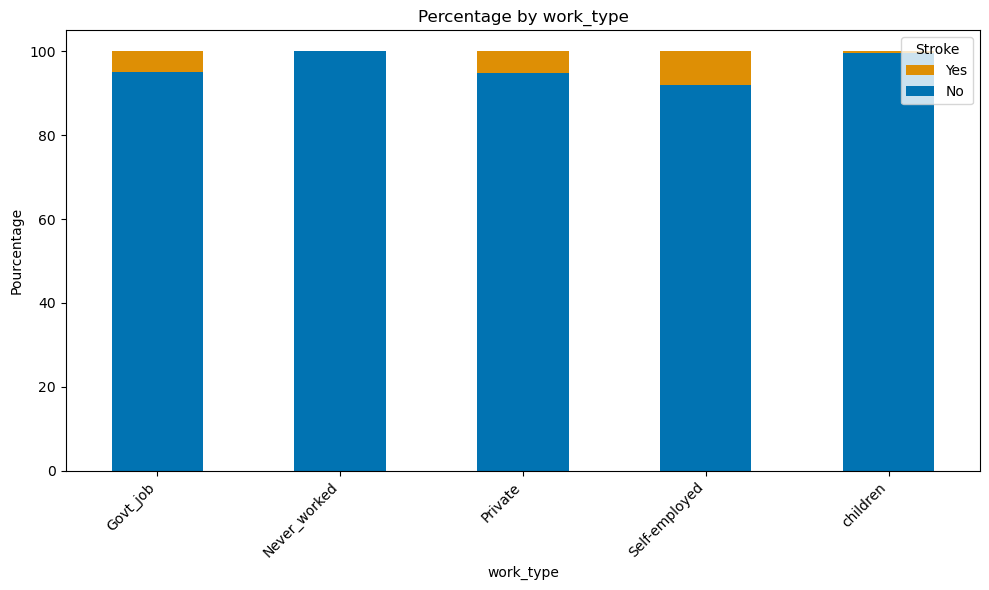

In [41]:
# Filter of wanted columns
df_filtered = df.filter(items=['work_type', 'stroke'])

# Map of modalities
df_filtered['stroke'] = df_filtered['stroke'].map({1: 'Yes', 0: 'No'})

# Percentages calculation
pourcentages = df_filtered.groupby(['work_type', 'stroke']).size().unstack() * 100 / df_filtered.groupby('work_type').size().values[:, None]

# Seaborn default colors
sns.set_palette("colorblind")

# Subplots creation
fig, ax = plt.subplots(figsize=(10, 6))
pourcentages.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette("colorblind"))

# Look and feel
ax.set_title('Percentage by work_type')
ax.set_xlabel('work_type')
ax.set_ylabel('Pourcentage')
ax.set_xticklabels(pourcentages.index, rotation=45, ha='right')

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::-1], labels=labels[::-1], title='Stroke', loc='upper right')

# Display
plt.tight_layout()
plt.show()

Self-employed, Private and Govt_job people seem have more stroke than others.<br/>
And Never_worked people don't seem to have stroke.<br/>
Obviously, this is only a general trend in this dataset and we have to stay prudent in our hypothesis.

# "residence_type" column

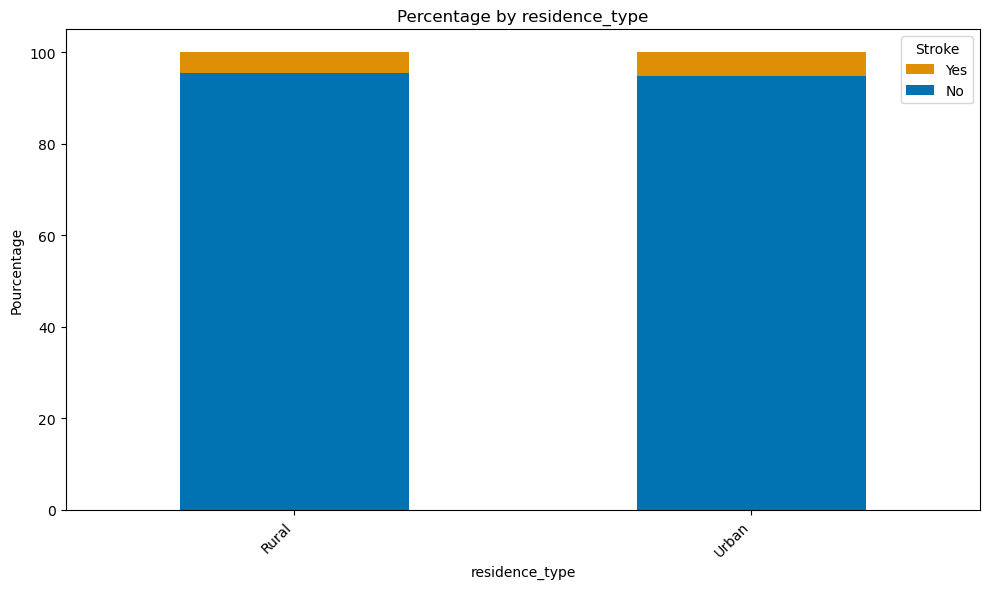

In [42]:
# Filter of wanted columns
df_filtered = df.filter(items=['residence_type', 'stroke'])

# Map of modalities
df_filtered['stroke'] = df_filtered['stroke'].map({1: 'Yes', 0: 'No'})

# Percentages calculation
pourcentages = df_filtered.groupby(['residence_type', 'stroke']).size().unstack() * 100 / df_filtered.groupby('residence_type').size().values[:, None]

# Seaborn default colors
sns.set_palette("colorblind")

# Subplots creation
fig, ax = plt.subplots(figsize=(10, 6))
pourcentages.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette("colorblind"))

# Look and feel
ax.set_title('Percentage by residence_type')
ax.set_xlabel('residence_type')
ax.set_ylabel('Pourcentage')
ax.set_xticklabels(pourcentages.index, rotation=45, ha='right')

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::-1], labels=labels[::-1], title='Stroke', loc='upper right')

# Display
plt.tight_layout()
plt.show()

residence_type doesn't seem to be a good discriminant.

# "smoking_status" column

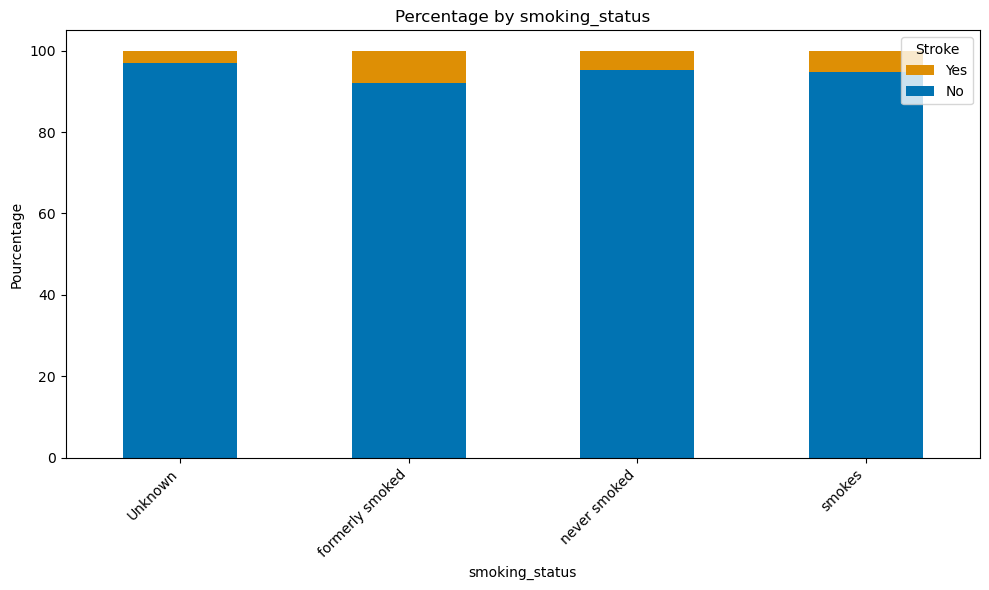

In [43]:
# Filter of wanted columns
df_filtered = df.filter(items=['smoking_status', 'stroke'])

# Map of modalities
df_filtered['stroke'] = df_filtered['stroke'].map({1: 'Yes', 0: 'No'})

# Percentages calculation
pourcentages = df_filtered.groupby(['smoking_status', 'stroke']).size().unstack() * 100 / df_filtered.groupby('smoking_status').size().values[:, None]

# Seaborn default colors
sns.set_palette("colorblind")

# Subplots creation
fig, ax = plt.subplots(figsize=(10, 6))
pourcentages.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette("colorblind"))

# Look and feel
ax.set_title('Percentage by smoking_status')
ax.set_xlabel('smoking_status')
ax.set_ylabel('Pourcentage')
ax.set_xticklabels(pourcentages.index, rotation=45, ha='right')

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::-1], labels=labels[::-1], title='Stroke', loc='upper right')

# Display
plt.tight_layout()
plt.show()

It seems that smoking_status doesn't have a huge influence on stroke.<br/>
We just observe a bigger part of stroke for formerly smoked people but even in this case the percentage is not huge.

# ------------------------

We will have to produce a correlation heatmap which is another way to understand our data and the possible correlations from our variables and stroke.

In [44]:
# Catch quantitative variable in a list
quantitative_columns = df.describe().columns.tolist()

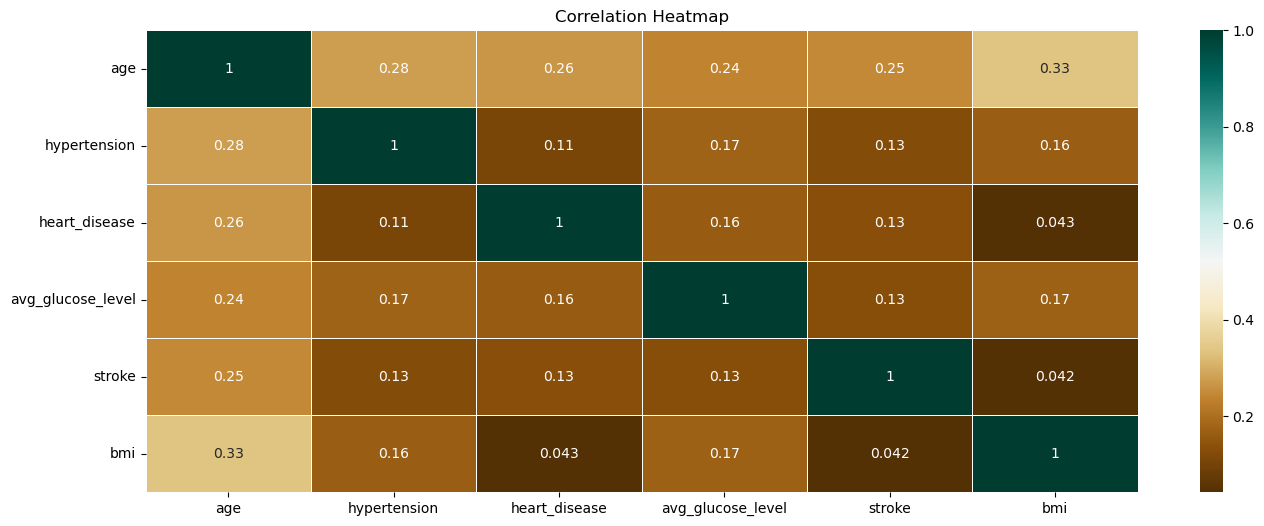

In [45]:
# Correlation Heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(df[quantitative_columns].corr(), annot=True, linewidth=.5, cmap='BrBG')
plt.title("Correlation Heatmap")
plt.show()

We find the same hypothesis that we saw previously:
- age is the most correlated variable with 0.25
- hypertension, heart_disease and avg_glucose_level have a small correlation ex-aequo to 0.13
- ever_married is a small negative correlation with -0.11
- other variables are not strongly correlated

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Preprocessing</h3>
</div>

First, we replace strings with integers:

In [46]:
# Convert categorical in integers with LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['residence_type'] = le.fit_transform(df['residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,smoking_status,stroke,bmi
0,1,67.0,0,1,1,2,1,228.69,1,1,36.60
1,0,61.0,0,0,1,3,0,202.21,2,1,30.78
2,1,80.0,0,1,1,2,0,105.92,2,1,32.50
3,0,49.0,0,0,1,2,1,171.23,3,1,34.40
4,0,79.0,1,0,1,3,0,174.12,2,1,24.00


**Normalization and standardization** are two techniques commonly used to scale data before using it in machine learning models.<br/>
It's sometimes difficult to decide whether to apply one or the other, both or nothing at all.<br/>
**Normalization** allows all variables to be put on the same scale, usually between 0 and 1.
This is useful when the data have non-normal distributions or when the amplitudes of the variables are very different.<br/>
<br/>
**Standardization** centers the data around 0 with a standard deviation of 1.<br/>
This works well when the data follow a normal or approximately normal distribution.<br/>
<br/>
**In this case, we choose to normalize because we have some different scales and 'avg_glucose_level' column has not a normal distribution.**

In [47]:
# Split between X (features) and y (target variable)
X = df.drop(columns='stroke')
y = df.stroke

In [48]:
# Normalization with MinMaxScaler
scaler = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(scaler, columns=X.columns)
X.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,smoking_status,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.207143,0.526692,0.097456,0.054012,0.656164,0.541928,0.508023,0.235563,0.458969,0.213261
std,0.246522,0.276033,0.296607,0.226063,0.475034,0.272573,0.499985,0.209046,0.357178,0.088493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.000000,0.000000,0.500000,0.000000,0.102137,0.000000,0.153494
50%,0.000000,0.548340,0.000000,0.000000,1.000000,0.500000,1.000000,0.169721,0.666667,0.206186
75%,0.500000,0.743652,0.000000,0.000000,1.000000,0.750000,1.000000,0.272228,0.666667,0.257732
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we know, we have a highly unbalanced dataset.<br/>
4861 (False) vs 249 (True)<br/>

**We are going to use the SMOTE method:**<br/>
"SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling method that creates new synthetic examples of the minority class using neighborhood techniques. This balances classes in unbalanced datasets, improving model performance by avoiding bias towards the majority class."

In [49]:
# Split between Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Count before SMOTE
print("### Count before SMOTE ###")
print(y_train.value_counts())

# Apply SMOTE to the train dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Count after SMOTE
print("### Count after SMOTE ###")
print(y_train.value_counts())

### Count before SMOTE ###
stroke
0    3663
1     169
Name: count, dtype: int64
### Count after SMOTE ###
stroke
0    3663
1    3663
Name: count, dtype: int64


Repartition of the dataset is now corrected

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Modeling</h3>
</div>

It is often difficult to decide which type of model to choose.<br/>
Here we have a rather small dataset and a classification problem (2 classes).<br/>
Let's compare these 3 approaches:<br/>
- Logistic regression :
	- Suitable for binary classification problems.
	- Easy to interpret.
- Decision Trees:
	- Can handle categorical data without preprocessing.
	- Interpretable and can capture non-linear interactions.
- Random Forests:
	- Combination of decision trees.
	- Handles categorical and numerical data well.
    - Good for reducing overfitting.

# Logistic Regression

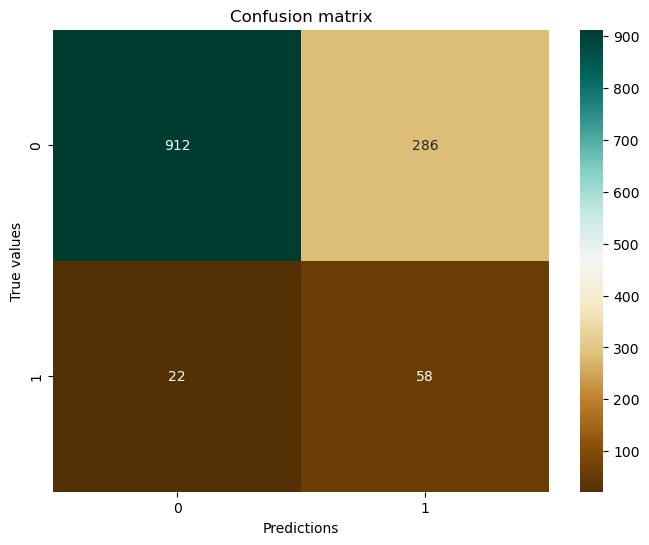

In [50]:
# Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BrBG')
plt.title('Confusion matrix')
plt.xlabel('Predictions')
plt.ylabel('True values')
plt.show()

In [51]:
# Report
class_report = classification_report(y_test, y_pred)
print("Classification report:")
print(class_report)

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1198
           1       0.17      0.72      0.27        80

    accuracy                           0.76      1278
   macro avg       0.57      0.74      0.56      1278
weighted avg       0.93      0.76      0.82      1278



**The model has very good precision for class 0 (98%) but very poor precision for class 1 (17%).<br/>**
**The accuracy of 0.76 indicates that the model correctly predicts the class for 76% of examples.**

# Decision Trees

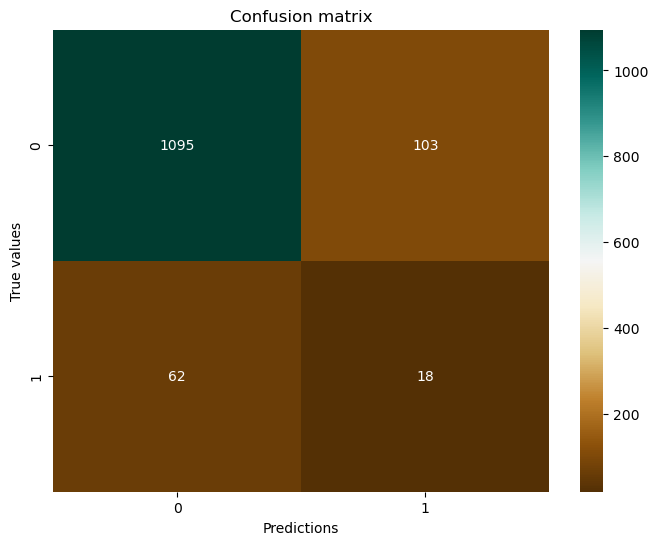

In [52]:
# Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BrBG')
plt.title('Confusion matrix')
plt.xlabel('Predictions')
plt.ylabel('True values')
plt.show()

In [53]:
# Report
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1198
           1       0.15      0.23      0.18        80

    accuracy                           0.87      1278
   macro avg       0.55      0.57      0.55      1278
weighted avg       0.90      0.87      0.88      1278



**The model has very good precision for class 0 (95%) but very poor precision for class 1 (15%).<br/>**
**The accuracy of 0.87 indicates that the model correctly predicts the class for 87% of examples.<br/>**
**As with the regression, we have a very good result for class 0 and a very poor result for class 1.**

# Random Forests

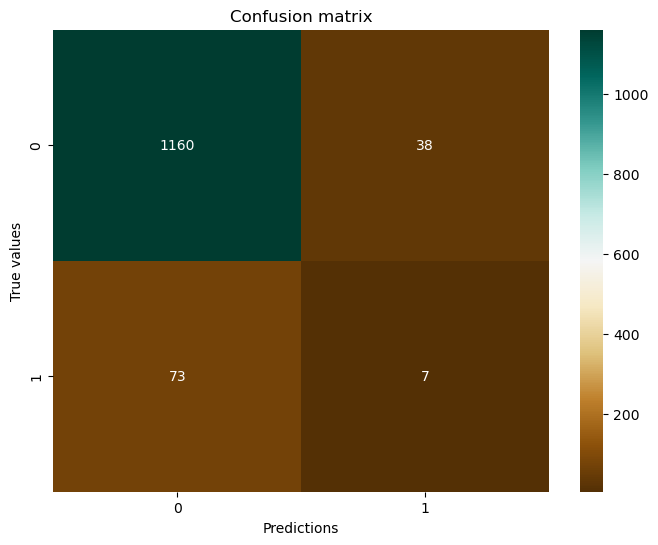

In [54]:
# Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BrBG')
plt.title('Confusion matrix')
plt.xlabel('Predictions')
plt.ylabel('True values')
plt.show()

In [55]:
# Report
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1198
           1       0.16      0.09      0.11        80

    accuracy                           0.91      1278
   macro avg       0.55      0.53      0.53      1278
weighted avg       0.89      0.91      0.90      1278



**The model has very good precision for class 0 (94%) and a little better precision for class 1 (16%).<br/>**
**The accuracy of 0.91 indicates that the model correctly predicts the class for 91% of examples.<br/>**
**We have here our best result for class 0 and our best result result for class 1.**

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">The Winner is Random Forrests for this use case.</h1>
</div>